Dataset indirildi: /kaggle/input/heartbeat


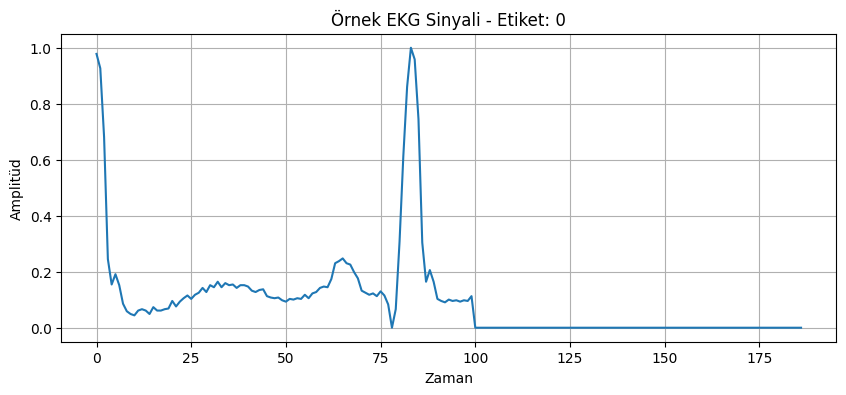

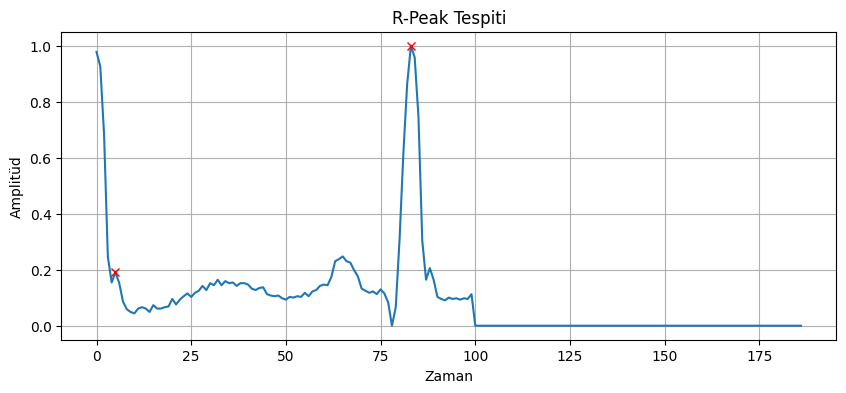


🔍 Lojistik Regresyon Modeli Eğitiliyor...
✅ Accuracy: 0.8201
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     18160
           1       0.00      0.00      0.00       535
           2       0.00      0.00      0.00      1402
           3       0.00      0.00      0.00       158
           4       0.19      0.02      0.04      1635

    accuracy                           0.82     21890
   macro avg       0.20      0.20      0.19     21890
weighted avg       0.70      0.82      0.75     21890



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


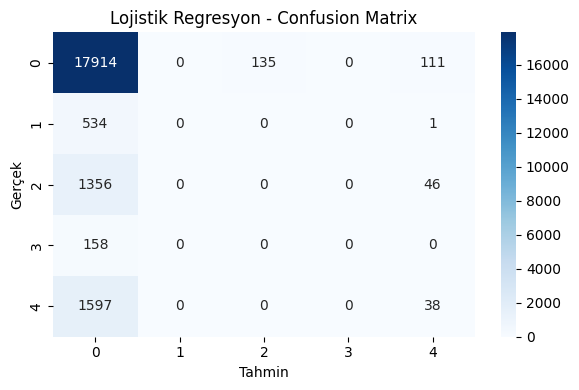

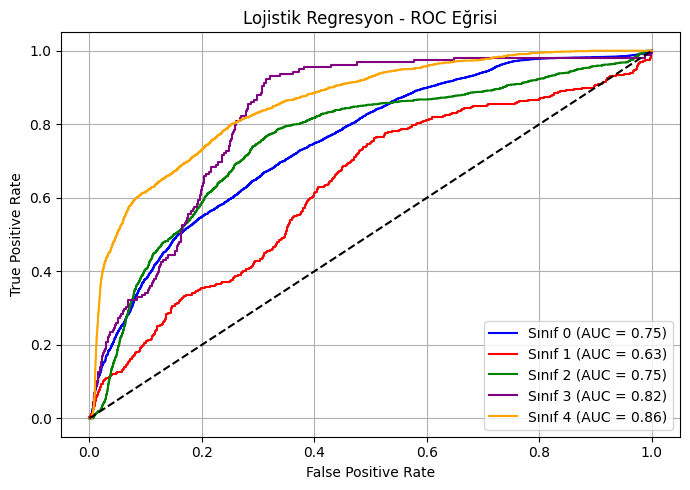


🔍 SVM Modeli Eğitiliyor...
✅ Accuracy: 0.8614
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     18160
           1       0.91      0.08      0.14       535
           2       0.67      0.14      0.23      1402
           3       0.00      0.00      0.00       158
           4       0.72      0.35      0.47      1635

    accuracy                           0.86     21890
   macro avg       0.63      0.31      0.36     21890
weighted avg       0.84      0.86      0.82     21890



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


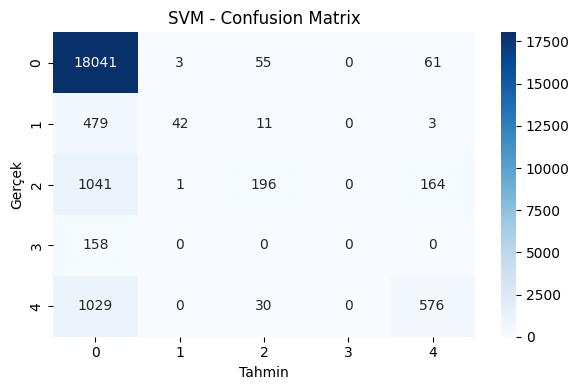

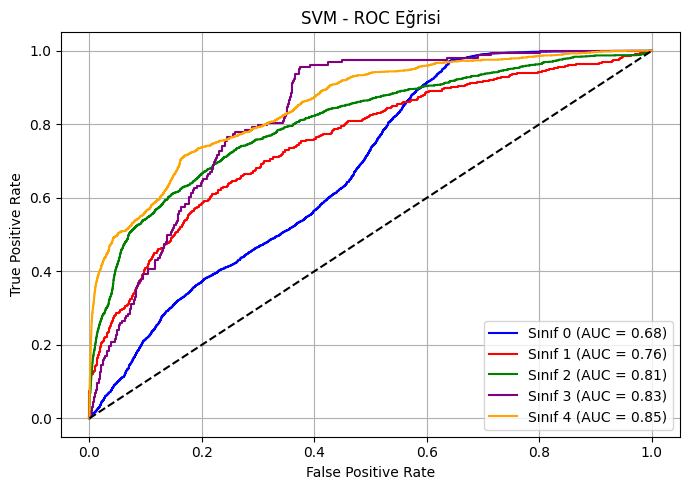


🔍 Karar Ağacı Modeli Eğitiliyor...
✅ Accuracy: 0.7909
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     18160
           1       0.21      0.23      0.22       535
           2       0.32      0.34      0.33      1402
           3       0.07      0.07      0.07       158
           4       0.43      0.44      0.43      1635

    accuracy                           0.79     21890
   macro avg       0.38      0.39      0.39     21890
weighted avg       0.80      0.79      0.79     21890



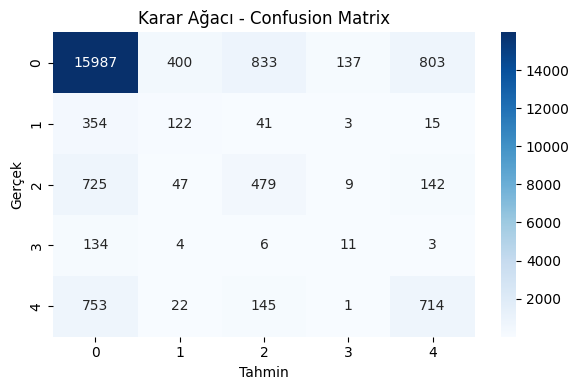

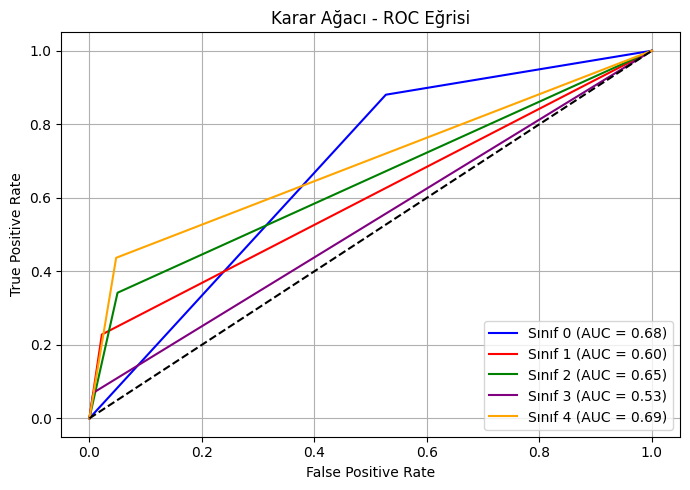


🔍 Random Forest Modeli Eğitiliyor...
✅ Accuracy: 0.8525
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     18160
           1       0.36      0.19      0.25       535
           2       0.52      0.33      0.40      1402
           3       0.22      0.05      0.08       158
           4       0.62      0.43      0.51      1635

    accuracy                           0.85     21890
   macro avg       0.52      0.39      0.43     21890
weighted avg       0.83      0.85      0.84     21890



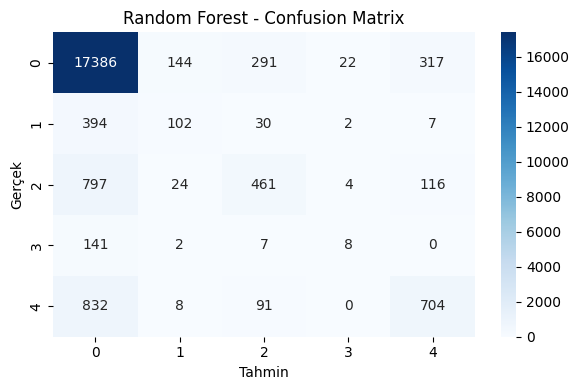

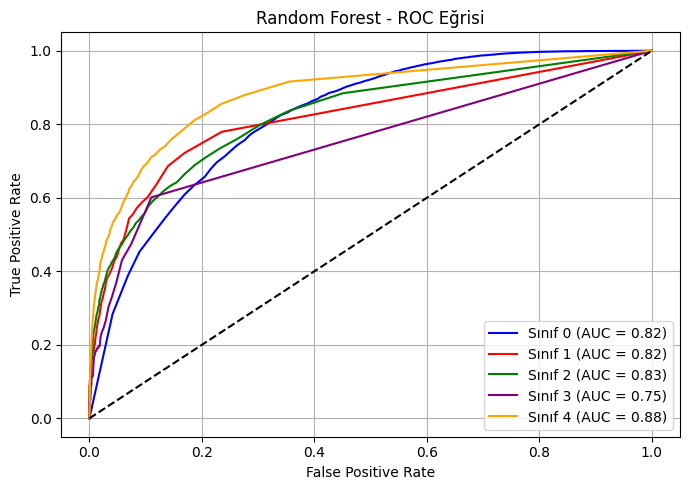


🔍 Yapay Sinir Ağı Modeli Eğitiliyor...
✅ Accuracy: 0.8691
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     18160
           1       0.78      0.08      0.14       535
           2       0.61      0.37      0.46      1402
           3       0.30      0.02      0.04       158
           4       0.75      0.40      0.52      1635

    accuracy                           0.87     21890
   macro avg       0.66      0.37      0.42     21890
weighted avg       0.85      0.87      0.84     21890



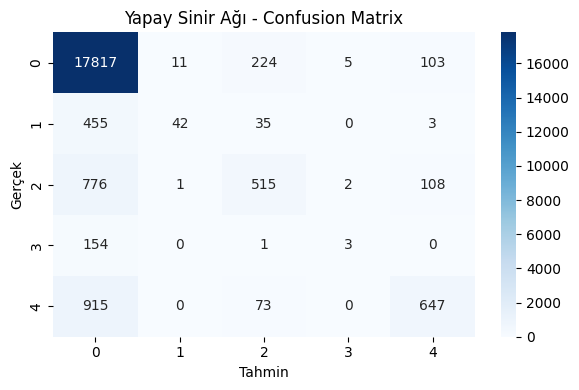

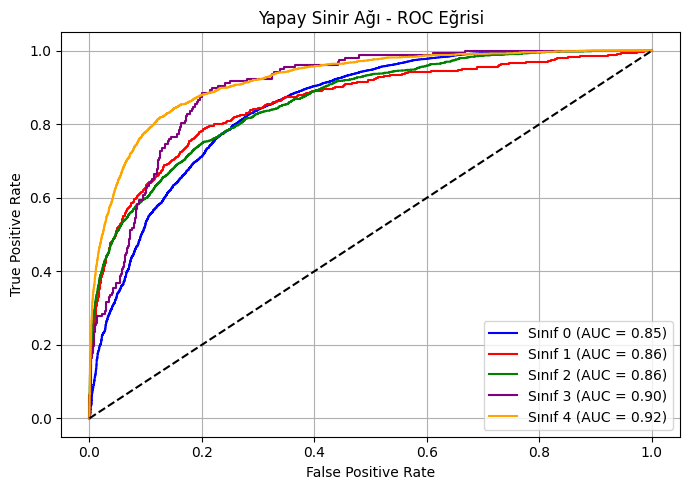

In [1]:
# Gerekli kütüphaneler
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_curve,
    auc
)
from scipy.signal import find_peaks

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# 1. Veri Setini İndirme
path = kagglehub.dataset_download("shayanfazeli/heartbeat")
print("Dataset indirildi:", path)

# 2. Veri Setini Yükleme
train_df = pd.read_csv(f"{path}/mitbih_train.csv", header=None)
test_df = pd.read_csv(f"{path}/mitbih_test.csv", header=None)

# Veriyi birleştir
data = pd.concat([train_df, test_df])
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.astype(int)

# EKG sinyallerinden örnek gösterelim
plt.figure(figsize=(10, 4))
plt.plot(X[0])
plt.title(f"Örnek EKG Sinyali - Etiket: {int(y[0])}")
plt.xlabel("Zaman")
plt.ylabel("Amplitüd")
plt.grid(True)
plt.show()

# 3. R-Peak Tespiti (örnek bir sinyal için)
signal = X[0]
peaks, _ = find_peaks(signal, distance=50)
plt.figure(figsize=(10, 4))
plt.plot(signal)
plt.plot(peaks, signal[peaks], "rx")
plt.title("R-Peak Tespiti")
plt.xlabel("Zaman")
plt.ylabel("Amplitüd")
plt.grid(True)
plt.show()

# 4. Özellik Çıkartma Fonksiyonu (RMS, Tepe Sayısı, Ortalama, Std)
def extract_features(signal):
    rms = np.sqrt(np.mean(signal**2))
    avg = np.mean(signal)
    std = np.std(signal)
    peak_count = len(find_peaks(signal, distance=50)[0])
    return [rms, avg, std, peak_count]

# Tüm sinyaller için özellik vektörü çıkar
X_features = np.array([extract_features(sig) for sig in X])

# 5. Veriyi Eğitim ve Test için Ayır
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# 6. Normalizasyon
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ROC eğrisi için etiketleri binarize et
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = len(classes)

# 7. 5 Farklı Modelin Eğitimi ve Değerlendirilmesi
models = {
    "Lojistik Regresyon": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Karar Ağacı": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Yapay Sinir Ağı": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
}

colors = ['blue', 'red', 'green', 'purple', 'orange']

for name, model in models.items():
    print(f"\n🔍 {name} Modeli Eğitiliyor...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")

    # Classification Report
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Tahmin")
    plt.ylabel("Gerçek")
    plt.tight_layout()
    plt.show()

    # ROC Curve
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        print("⚠️ ROC eğrisi çizilemiyor (model desteklemiyor).")
        continue

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(7, 5))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=colors[i], label=f'Sınıf {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"{name} - ROC Eğrisi")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
